In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import time
import random

from collections import Counter
import pickle

from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.datasets import make_blobs

import nltk
from nltk import word_tokenize, pos_tag, sent_tokenize
from nltk.collocations import *

import seaborn as sns

import folium # for map visualization, and this is a new package needed to be installed from the anaconda.
from folium import plugins
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

In [39]:
"""Step 1: read in data.

"""

df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
org = df.shape[0]
print("Original number of instances: {}".format(org))
df.head(8)

Original number of instances: 371528


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [40]:
"""Step 2: Clean data

i. drop data.

"""

df.drop(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'model', 'notRepairedDamage', 
         'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'lastSeen'], axis=1, inplace=True)
print(df.shape)

(371528, 9)


In [9]:
"""Step 2: Clean data

ii. Check NaNs.drop NaNs.

"""

print(df.isnull().any()) # No NAN. If there is any, comment out the following. 
print()

print(df.shape)


price                 False
vehicleType            True
yearOfRegistration    False
gearbox                True
powerPS               False
kilometer             False
fuelType               True
brand                 False
postalCode            False
dtype: bool

(371528, 9)


# Clean Data.

- Step 1: Drop NaNs.
- Step 2: Drop Andere.
- Step 3: Drop minorities.
- Step 4: Drop too cheap, too expensive, too old.

### Step 1: Drop NaNs

In [41]:
"""Step 1: Drop NaNs.

"""
# Nans in vehivle type:
index_list = df['vehicleType'].index[df['vehicleType'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in vehicleType:\n{}".format(df.shape))


# Nans in fuel type
index_list = df['fuelType'].index[df['fuelType'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in fuelType:\n{}".format(df.shape))


# Nans in gearbox
index_list = df['gearbox'].index[df['gearbox'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in fuelType:\n{}".format(df.shape))

Dataframe shape after dropping the NaNs in vehicleType:
(333659, 9)
Dataframe shape after dropping the NaNs in fuelType:
(317768, 9)
Dataframe shape after dropping the NaNs in fuelType:
(309900, 9)


In [42]:
data = df.copy()
data.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,postalCode
0,18300,coupe,2011,manuell,190,125000,diesel,audi,66954
1,9800,suv,2004,automatik,163,125000,diesel,jeep,90480
2,1500,kleinwagen,2001,manuell,75,150000,benzin,volkswagen,91074
3,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda,60437
4,650,limousine,1995,manuell,102,150000,benzin,bmw,33775


In [6]:
""" Standardize numerical data:



num_col = ['price', 'powerPS', 'kilometer', 'yearOfRegistration']
# cat_col = []

for column in num_col:
    mean = data[column].mean()
    std = data[column].std()
    data[column] = (data[column]-mean)/std

data.head(8)
"""

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,postalCode
0,0.000625,coupe,1.210013,manuell,0.371500,-0.005624,diesel,audi,66954
1,-0.001564,suv,0.178550,automatik,0.220482,-0.005624,diesel,jeep,90480
2,-0.003701,kleinwagen,-0.263506,manuell,-0.271725,0.626713,benzin,volkswagen,91074
3,-0.003160,kleinwagen,0.767957,manuell,-0.305284,-0.890896,diesel,skoda,60437
4,-0.003919,limousine,-1.147617,manuell,-0.120707,0.626713,benzin,bmw,33775
5,-0.003520,cabrio,0.178550,manuell,-0.081554,0.626713,benzin,peugeot,67112
6,-0.004087,limousine,-3.357895,manuell,-0.411556,-2.155570,benzin,volkswagen,19348
7,-0.000354,bus,1.652068,manuell,0.007938,-2.408504,benzin,ford,94505


In [43]:
""" Explore the categorical variables.

"""

lst_v = data['vehicleType'].tolist()
lst_b = data['brand'].tolist()
lst_g = data['gearbox'].tolist()
lst_f = data['fuelType'].tolist()
#v_type = list(set(lst))
#print(v_type)

count_v = Counter(lst_v)
count_b = Counter(lst_b)
count_g = Counter(lst_g)
count_f = Counter(lst_f)

print(count_v)
print()

print(count_b)
print()

print(count_g)
print()

print(count_f)
print()


Counter({'limousine': 89859, 'kleinwagen': 72650, 'kombi': 62828, 'bus': 28501, 'cabrio': 21443, 'coupe': 17768, 'suv': 14002, 'andere': 2849})

Counter({'volkswagen': 64633, 'bmw': 35305, 'opel': 32107, 'mercedes_benz': 31003, 'audi': 28601, 'ford': 20981, 'renault': 14240, 'peugeot': 9370, 'fiat': 7719, 'seat': 5796, 'skoda': 5091, 'mazda': 4786, 'citroen': 4353, 'nissan': 4225, 'toyota': 4152, 'smart': 3888, 'hyundai': 3188, 'mini': 3106, 'volvo': 2946, 'mitsubishi': 2515, 'sonstige_autos': 2465, 'honda': 2298, 'kia': 2217, 'porsche': 1986, 'suzuki': 1960, 'alfa_romeo': 1957, 'chevrolet': 1595, 'chrysler': 1237, 'dacia': 803, 'jeep': 711, 'land_rover': 707, 'subaru': 648, 'daihatsu': 642, 'jaguar': 560, 'saab': 472, 'daewoo': 425, 'lancia': 384, 'rover': 365, 'trabant': 290, 'lada': 173})

Counter({'manuell': 239219, 'automatik': 70681})

Counter({'benzin': 204146, 'diesel': 99789, 'lpg': 4969, 'cng': 511, 'hybrid': 257, 'andere': 138, 'elektro': 90})



In [44]:
""" Create dataframe drop_andere

"""

drop_andere = data.copy()
drop_andere.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,postalCode
0,18300,coupe,2011,manuell,190,125000,diesel,audi,66954
1,9800,suv,2004,automatik,163,125000,diesel,jeep,90480
2,1500,kleinwagen,2001,manuell,75,150000,benzin,volkswagen,91074
3,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda,60437
4,650,limousine,1995,manuell,102,150000,benzin,bmw,33775


### Step 2: Drop 'others' - 'andere'

In [45]:
cat_col = ['vehicleType', 'gearbox', 'fuelType', 'brand']

print("Original data shape: {}".format(drop_andere.shape))

# Check the missing values: 
for cols in cat_col:
    index_list = drop_andere[cols].index[drop_andere[cols] == 'andere'].tolist()
    print("Column {}: \n************************\nIndex that coded unknow:\n{}".format(cols, index_list))
    print()
    
    # Drop the rows with index_list generated above. 
    temp=drop_andere.drop(np.array(index_list))

    # Need to reset the index, otherwise the index are gone after the drop. 
    drop_andere = temp.reset_index(drop=True)
print("New data shape: {}".format(drop_andere.shape))

Original data shape: (309900, 9)
Column vehicleType: 
************************
Index that coded unknow:
[26, 54, 148, 335, 353, 394, 507, 667, 702, 762, 778, 793, 897, 926, 959, 962, 1112, 1176, 1181, 1480, 1488, 1500, 1532, 1579, 1604, 1790, 1813, 1909, 2059, 2141, 2188, 2379, 2387, 2435, 2640, 2666, 2759, 2888, 2911, 3155, 3252, 3391, 3469, 3584, 3788, 3811, 4244, 4351, 4649, 4793, 4829, 4984, 5090, 5118, 5121, 5287, 5339, 5349, 5557, 5617, 5770, 5917, 6431, 6492, 6694, 6864, 7016, 7036, 7091, 7319, 7427, 7492, 7509, 7512, 7981, 7992, 8012, 8051, 8204, 8250, 8296, 8373, 8867, 8967, 9125, 9163, 9410, 9522, 9628, 9640, 10105, 10225, 10230, 10245, 10306, 10370, 10496, 10635, 10865, 10994, 11106, 11131, 11132, 11238, 11293, 11450, 11496, 11685, 11758, 11820, 11910, 11940, 12086, 12156, 12368, 12560, 12597, 12640, 12644, 12707, 12721, 12724, 12892, 13020, 13067, 13195, 13324, 13383, 13587, 13643, 13977, 14011, 14169, 14418, 14462, 14474, 14758, 14770, 14813, 15187, 15287, 15442, 15493, 15

Column brand: 
************************
Index that coded unknow:
[]

New data shape: (306940, 9)


In [46]:

lst_v = drop_andere['vehicleType'].tolist()
lst_b = drop_andere['brand'].tolist()
lst_g = drop_andere['gearbox'].tolist()
lst_f = drop_andere['fuelType'].tolist()
#v_type = list(set(lst))
#print(v_type)

count_v = Counter(lst_v)
count_b = Counter(lst_b)
count_g = Counter(lst_g)
count_f = Counter(lst_f)

print(count_v)
print()

print(count_b)
print()

print(count_g)
print()

print(count_f)
print()


Counter({'limousine': 89815, 'kleinwagen': 72628, 'kombi': 62805, 'bus': 28494, 'cabrio': 21438, 'coupe': 17765, 'suv': 13995})

Counter({'volkswagen': 63945, 'bmw': 35080, 'opel': 31880, 'mercedes_benz': 30735, 'audi': 28497, 'ford': 20771, 'renault': 14031, 'peugeot': 9292, 'fiat': 7553, 'seat': 5732, 'skoda': 5065, 'mazda': 4735, 'citroen': 4239, 'nissan': 4187, 'toyota': 4132, 'smart': 3885, 'hyundai': 3176, 'mini': 3087, 'volvo': 2938, 'mitsubishi': 2491, 'sonstige_autos': 2281, 'honda': 2272, 'kia': 2194, 'porsche': 1975, 'suzuki': 1947, 'alfa_romeo': 1944, 'chevrolet': 1549, 'chrysler': 1226, 'dacia': 797, 'jeep': 709, 'land_rover': 703, 'subaru': 645, 'daihatsu': 630, 'jaguar': 560, 'saab': 470, 'daewoo': 420, 'lancia': 384, 'rover': 361, 'trabant': 251, 'lada': 171})

Counter({'manuell': 236613, 'automatik': 70327})

Counter({'benzin': 202794, 'diesel': 98374, 'lpg': 4941, 'cng': 497, 'hybrid': 255, 'elektro': 79})



### Step 3: Drop Minorities:

In [47]:
""" Step 3: Drop Minorities:

Detect Minorities.

"""

dict_b = dict(count_b)
dict_f = dict(count_f)
#print(dict_b)

arr = np.array(list(count_b.values()))
total = np.sum(arr)

lst_drop_b = []
for key, value in dict_b.items():
    if value <= (total/500):
        lst_drop_b.append(key)

print(lst_drop_b)
print()

lst_drop_f = []
for key, value in dict_f.items():
    if value <= (total/500):
        lst_drop_f.append(key)

print(lst_drop_f)


['lancia', 'saab', 'jaguar', 'rover', 'daewoo', 'trabant', 'lada']

['hybrid', 'cng', 'elektro']


In [49]:
""" Drop Minorities:


"""

drop_minor = drop_andere.copy()
# drop_minor.head(8)
print(drop_minor.shape)

lst_drop_b = ['lancia', 'saab', 'jaguar', 'rover', 'daewoo', 'trabant', 'lada', 'sonstige_autos']

# Drop the minorities in brands:
for brand in lst_drop_b:
    index_list = drop_minor['brand'].index[drop_minor['brand'] == brand].tolist()
    #print("Column {}: \n************************\nIndex that coded unknow:\n{}".format(cols, index_list))
    #print()
    
    # Drop the rows with index_list generated above. 
    temp=drop_minor.drop(np.array(index_list))

    # Need to reset the index, otherwise the index are gone after the drop. 
    drop_minor = temp.reset_index(drop=True)
print("New data shape after dropping brands: {}".format(drop_minor.shape))

# Drop the minorities in fuel type. 
for fuel in lst_drop_f:
    index_list = drop_minor['fuelType'].index[drop_minor['fuelType'] == fuel].tolist()
    #print("Column {}: \n************************\nIndex that coded unknow:\n{}".format(cols, index_list))
    #print()
    
    # Drop the rows with index_list generated above. 
    temp=drop_minor.drop(np.array(index_list))

    # Need to reset the index, otherwise the index are gone after the drop. 
    drop_minor = temp.reset_index(drop=True)
print("New data shape after dropping brands: {}".format(drop_minor.shape))


New data shape after dropping brands: (302042, 9)
New data shape after dropping brands: (301264, 9)


### Step 4: Drop too cheap, too expensive, too old

In [52]:
""" Step 4: drop too cheap, too expensive and too old. 

"""

drop_too = drop_minor.copy()

# too old:
index_list = drop_too['yearOfRegistration'].index[drop_too['yearOfRegistration']<1950].tolist()
drop_too=drop_too.drop(np.array(index_list))
drop_too = drop_too.reset_index(drop=True)
print("Dataframe shape after dropping too old:\n{}".format(drop_too.shape))


# too cheap
index_list = drop_too['price'].index[drop_too['price']<1000].tolist()
drop_too=drop_too.drop(np.array(index_list))
drop_too = drop_too.reset_index(drop=True)
print("Dataframe shape after dropping too cheap:\n{}".format(drop_too.shape))

# too expensive
index_list = drop_too['price'].index[drop_too['price']>100000].tolist()
drop_too=drop_too.drop(np.array(index_list))
drop_too = drop_too.reset_index(drop=True)
print("Dataframe shape after dropping too expensive:\n{}".format(drop_too.shape))

Dataframe shape after dropping too old:
(301209, 9)
Dataframe shape after dropping too cheap:
(245709, 9)
Dataframe shape after dropping too expensive:
(245479, 9)


In [55]:
""" Check the remaining rate

"""
cleaned_org = drop_too.shape[0]
print("The number of instances after dropping Nans, andere and minorities: {}".format(cleaned_org))

rate = cleaned_org/org
print("Data remaining rate: {}%".format(np.round(rate*100, 2)))

The number of instances after dropping Nans, andere and minorities: 245479
Data remaining rate: 66.07%


In [67]:
set(drop_minor['brand'].unique().tolist())

{'alfa_romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daihatsu',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'jeep',
 'kia',
 'land_rover',
 'mazda',
 'mercedes_benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'seat',
 'skoda',
 'smart',
 'subaru',
 'suzuki',
 'toyota',
 'volkswagen',
 'volvo'}

# Domain Knowledge

## Translations:
'limousine': 'limo', 'kleinwagen': 'hatchback', 'kombi': 'station_wagon', 'bus': 'bus', 'cabrio': 'convertible', 'coupe': 'coupe', 'suv': 'suv', 'andere':'others' 


## Devide brands into group:

Since this is a German dataset, I divided German car brands into maker-groups, then other car brands based on the headquarters.
The reason lies in that when speaking of the cars, one might not notice its parent company, but would has a general idea of where this car comes from, which may influence the decision making of buy the car.

 - Volkswagen: 'volkswagen', 'audi', 'porsche', 'seat', 'skoda' 
 - BMW: 'bmw', 'mini' 
 - Daimler: 'mercedes_benz', 'smart' 
 - Other German: 'opel' 
 - Italian: 'fiat', 'alfa_romeo' 
 - American: 'chevrolet', 'ford', 'jeep', 'chrysler' 
 - Japan: 'honda','suzuki', 'mazda', 'toyota', 'daihatsu','nissan', 'mitsubishi', 'subaru' 
 - French: 'peugeot', 'citroen', 'renault' 
 - Korean: 'Kia', 'hyundai' 
 - Others:'volvo', 'dacia', 'land_rover' 
 
 Drop: 'sonstige_autos', meaning others.
 


In [75]:
""" Add columns for group:

"""

add_group = drop_too.copy()

In [76]:
lst_group = [['volkswagen', 'audi', 'porsche', 'seat', 'skoda'], ['bmw', 'mini'], ['mercedes_benz', 'smart'], ['opel'], 
 ['fiat', 'alfa_romeo'], ['chevrolet', 'ford', 'jeep', 'chrysler'], 
 ['honda','suzuki', 'mazda', 'toyota', 'daihatsu','nissan', 'mitsubishi', 'subaru'], ['peugeot', 'citroen', 'renault'],
 ['kia', 'hyundai'], ['volvo', 'dacia', 'land_rover']]
group_name = ['Volkswagen', 'BMW', 'Daimler', 'Other_German', 'Italian', 'American', 'Japan', 'French', 'Korean','Others']

num = len(add_group['brand'])
#print(len(lst_group))
#print(len(group_name))
maker_group = []

for i in range(num):
    for brand,group in zip(lst_group, group_name):
        #print(brand, group)
        if add_group['brand'].iloc[i] in brand:
            maker_group.append(group)
            break

print(len(maker_group))

add_group.head()

245479


,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,postalCode
0,18300,coupe,2011,manuell,190,125000,diesel,audi,66954
1,9800,suv,2004,automatik,163,125000,diesel,jeep,90480
2,1500,kleinwagen,2001,manuell,75,150000,benzin,volkswagen,91074
3,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda,60437
4,2200,cabrio,2004,manuell,109,150000,benzin,peugeot,67112


In [77]:
data_dict = add_group.to_dict()
data_dict['maker_group'] = pd.Series(maker_group)
#data_dict['maker_group']

In [78]:
with_group=DataFrame.from_dict(data_dict)
with_group.head()

,brand,fuelType,gearbox,kilometer,maker_group,postalCode,powerPS,price,vehicleType,yearOfRegistration
0,audi,diesel,manuell,125000,Volkswagen,66954,190,18300,coupe,2011
1,jeep,diesel,automatik,125000,American,90480,163,9800,suv,2004
2,volkswagen,benzin,manuell,150000,Volkswagen,91074,75,1500,kleinwagen,2001
3,skoda,diesel,manuell,90000,Volkswagen,60437,69,3600,kleinwagen,2008
4,peugeot,benzin,manuell,150000,French,67112,109,2200,cabrio,2004


# Exploring the data

In [79]:
all_data = with_group.copy()

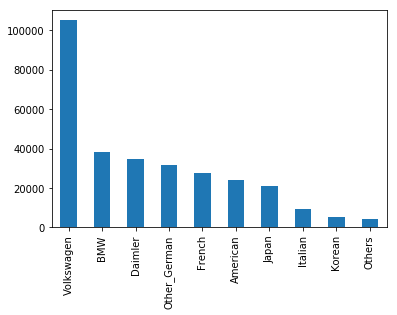

In [93]:
all_data['maker_group'].value_counts().plot(kind='bar')
plt.show()

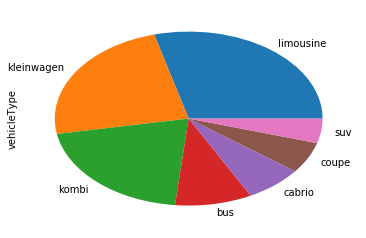

In [110]:
all_data['vehicleType'].value_counts().plot(kind='pie')
plt.show()

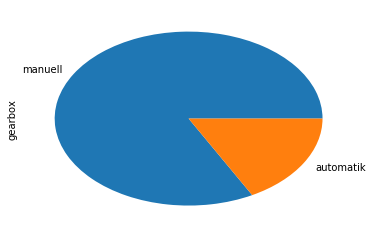

In [111]:
all_data[all_data['vehicleType']=='bus']['gearbox'].value_counts().plot(kind='pie')
plt.show()

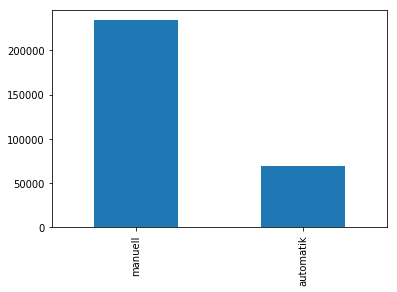

In [106]:
all_data['gearbox'].value_counts().plot(kind='bar')
plt.show()

# Only focus on family use:

Drop limo and bus.

In [80]:
family_use = all_data.copy()

In [81]:
# Limo in vehivle type:
index_list = family_use['vehicleType'].index[family_use['vehicleType'] == 'limousine'].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

family_use=family_use.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
family_use = family_use.reset_index(drop=True)
print("Dataframe shape after dropping the limo in vehicleType:\n{}".format(family_use.shape))


# Bus in vehicle type
index_list = family_use['vehicleType'].index[family_use['vehicleType'] == 'bus'].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

family_use=family_use.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
family_use = family_use.reset_index(drop=True)
print("Dataframe shape after dropping the bus in vehicleType:\n{}".format(family_use.shape))


Dataframe shape after dropping the limo in vehicleType:
(172405, 10)
Dataframe shape after dropping the bus in vehicleType:
(146769, 10)


In [82]:
fam_use_pickle = open('fam_use.pkl', 'wb')
pickle.dump(family_use, fam_use_pickle)
fam_use_pickle.close()

In [83]:
family_use = pickle.load(open('fam_use.pkl', 'rb'))

In [84]:
family_use.head()

,brand,fuelType,gearbox,kilometer,maker_group,postalCode,powerPS,price,vehicleType,yearOfRegistration
0,audi,diesel,manuell,125000,Volkswagen,66954,190,18300,coupe,2011
1,jeep,diesel,automatik,125000,American,90480,163,9800,suv,2004
2,volkswagen,benzin,manuell,150000,Volkswagen,91074,75,1500,kleinwagen,2001
3,skoda,diesel,manuell,90000,Volkswagen,60437,69,3600,kleinwagen,2008
4,peugeot,benzin,manuell,150000,French,67112,109,2200,cabrio,2004


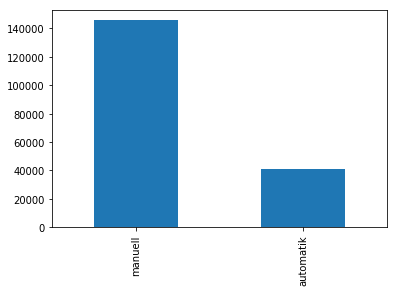

In [114]:
family_use['gearbox'].value_counts().plot(kind='bar')
plt.show()

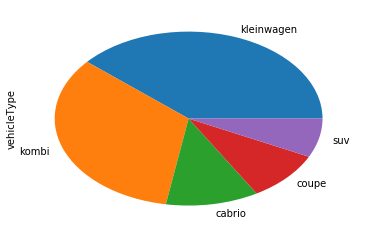

In [24]:
family_use['vehicleType'].value_counts().plot(kind='pie')
plt.show()

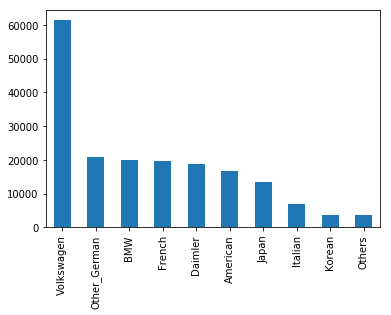

In [25]:
family_use['maker_group'].value_counts().plot(kind='bar')
plt.show()

## Commercial Use Cars

In [85]:
com_use = all_data.copy()
shape_orig = com_use.shape
#print(shape_orig[0])

In [86]:
domestic=com_use['vehicleType'].unique().tolist()
domestic.remove('limousine')
domestic.remove('bus')
print(domestic)

['coupe', 'suv', 'kleinwagen', 'cabrio', 'kombi']


In [87]:
# Drop domesitic uses:
for t in domestic:
    index_list = com_use['vehicleType'].index[com_use['vehicleType'] == t].tolist()
    com_use=com_use.drop(np.array(index_list))

    # Need to reset the index, otherwise the index are gone after the drop. 
    com_use = com_use.reset_index(drop=True)
    print("Dataframe shape after dropping {} in vehicleType:\n{}".format(t, com_use.shape))
    
shape_com = com_use.shape
print(shape_com[0])

Dataframe shape after dropping coupe in vehicleType:
(230712, 10)
Dataframe shape after dropping suv in vehicleType:
(217750, 10)
Dataframe shape after dropping kleinwagen in vehicleType:
(170218, 10)
Dataframe shape after dropping cabrio in vehicleType:
(150731, 10)
Dataframe shape after dropping kombi in vehicleType:
(98710, 10)
98710


In [88]:
com_use_pickle = open('com_use.pkl', 'wb')
pickle.dump(com_use, com_use_pickle)
com_use_pickle.close()

In [89]:
com_use = pickle.load(open('com_use.pkl', 'rb'))

In [71]:
com_use.head()

,brand,fuelType,gearbox,kilometer,maker_group,postalCode,powerPS,price,vehicleType,yearOfRegistration
0,bmw,benzin,manuell,150000,BMW,33775,102,650,limousine,1995
1,volkswagen,benzin,manuell,40000,Volkswagen,19348,50,0,limousine,1980
2,ford,benzin,manuell,30000,American,94505,125,14500,bus,2014
3,mazda,benzin,manuell,150000,Japan,96224,105,2000,limousine,2004
4,ford,diesel,manuell,150000,American,88361,136,7550,bus,2007


## German Cars
- ['Volkswagen', 'BMW', 'Daimler', 'Other_German']

In [90]:
german_cars = family_use.copy()

In [91]:
shape_org_ger = german_cars.shape
print(shape_org_ger[0])

146769


In [92]:
german = ['Volkswagen', 'BMW', 'Daimler', 'Other_German']
others = ['Italian', 'American', 'Japan', 'French', 'Korean','Others']

for g in others:
    index_list = german_cars['maker_group'].index[german_cars['maker_group'] == g].tolist()
    german_cars= german_cars.drop(np.array(index_list))

    # Need to reset the index, otherwise the index are gone after the drop. 
    german_cars = german_cars.reset_index(drop=True)
    print("Dataframe shape after dropping {} in maker_group:\n{}".format(g, german_cars.shape))
    
shape_ger = german_cars.shape
print(shape_ger[0])

Dataframe shape after dropping Italian in maker_group:
(142065, 10)
Dataframe shape after dropping American in maker_group:
(130410, 10)
Dataframe shape after dropping Japan in maker_group:
(119864, 10)
Dataframe shape after dropping French in maker_group:
(106057, 10)
Dataframe shape after dropping Korean in maker_group:
(102703, 10)
Dataframe shape after dropping Others in maker_group:
(99651, 10)
99651


In [96]:
german_pickle = open('german.pkl', 'wb')
pickle.dump(german_cars, german_pickle)
german_pickle.close()

In [14]:
german_cars = pickle.load(open('german.pkl', 'rb'))
german_cars.head()

,brand,fuelType,gearbox,kilometer,maker_group,postalCode,powerPS,price,vehicleType,yearOfRegistration
0,audi,diesel,manuell,125000,Volkswagen,66954,190,18300,coupe,2011
1,volkswagen,benzin,manuell,150000,Volkswagen,91074,75,1500,kleinwagen,2001
2,skoda,diesel,manuell,90000,Volkswagen,60437,69,3600,kleinwagen,2008
3,volkswagen,diesel,manuell,150000,Volkswagen,57290,140,2799,kombi,2005
4,volkswagen,benzin,manuell,100000,Volkswagen,75365,160,10400,coupe,2009


In [16]:
german_c = german_cars.copy()

In [17]:
print(german_c.shape)
german_c.drop(['brand','postalCode'], axis=1, inplace=True)
print(german_c.shape)

(99651, 10)
(99651, 8)


In [18]:
list_m = german_c['maker_group'].tolist()
count_m = Counter(list_m)
print(count_m)

list_vv = german_c['vehicleType'].tolist()
count_vv = Counter(list_vv)
print(count_vv)

Counter({'Volkswagen': 50578, 'BMW': 18408, 'Daimler': 17423, 'Other_German': 13242})
Counter({'kombi': 40835, 'kleinwagen': 26547, 'cabrio': 14336, 'coupe': 12226, 'suv': 5707})


In [19]:
obj_df = german_c.select_dtypes(include=['object']).copy()
obj_df.head()

,fuelType,gearbox,maker_group,vehicleType
0,diesel,manuell,Volkswagen,coupe
1,benzin,manuell,Volkswagen,kleinwagen
2,diesel,manuell,Volkswagen,kleinwagen
3,diesel,manuell,Volkswagen,kombi
4,benzin,manuell,Volkswagen,coupe


In [20]:
for ele in list(obj_df.columns):
    print(np.unique(obj_df[ele].values))

['benzin' 'diesel' 'lpg']
['automatik' 'manuell']
['BMW' 'Daimler' 'Other_German' 'Volkswagen']
['cabrio' 'coupe' 'kleinwagen' 'kombi' 'suv']


In [21]:
german_c = pd.get_dummies(german_c, columns=list(obj_df.columns))
german_c.head(8)

,kilometer,powerPS,price,yearOfRegistration,fuelType_benzin,fuelType_diesel,fuelType_lpg,gearbox_automatik,gearbox_manuell,maker_group_BMW,maker_group_Daimler,maker_group_Other_German,maker_group_Volkswagen,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_suv
0,125000,190,18300,2011,0,1,0,0,1,0,0,0,1,0,1,0,0,0
1,150000,75,1500,2001,1,0,0,0,1,0,0,0,1,0,0,1,0,0
2,90000,69,3600,2008,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,150000,140,2799,2005,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,100000,160,10400,2009,1,0,0,0,1,0,0,0,1,0,1,0,0,0
5,150000,193,2500,2002,0,1,0,1,0,1,0,0,0,0,0,0,1,0
6,80000,61,3900,2008,1,0,0,1,0,0,1,0,0,0,0,1,0,0
7,150000,193,2100,1998,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [22]:
german_c_pickle = open('german_c.pkl', 'wb')
pickle.dump(german_c, german_c_pickle)
german_c_pickle.close()

In [23]:
german_c = pickle.load(open('german_c.pkl', 'rb'))
german_c.head()

,kilometer,powerPS,price,yearOfRegistration,fuelType_benzin,fuelType_diesel,fuelType_lpg,gearbox_automatik,gearbox_manuell,maker_group_BMW,maker_group_Daimler,maker_group_Other_German,maker_group_Volkswagen,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_suv
0,125000,190,18300,2011,0,1,0,0,1,0,0,0,1,0,1,0,0,0
1,150000,75,1500,2001,1,0,0,0,1,0,0,0,1,0,0,1,0,0
2,90000,69,3600,2008,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,150000,140,2799,2005,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,100000,160,10400,2009,1,0,0,0,1,0,0,0,1,0,1,0,0,0


In [24]:
german_cleaned = german_c.copy()

In [25]:
""" Standardize numerical data:

In this way, I can easily normalize newly input data with the same mechanisms.

"""
# ['price', 'powerPS', 'kilometer', 'yearOfRegistration']
num_col = list(german_cleaned.columns)
# cat_col = []
means = {}
stds = {}
for column in num_col:
    mean = german_cleaned[column].mean()
    means[column] = mean
    std = german_cleaned[column].std()
    stds[column] = std
    german_cleaned[column] = (german_cleaned[column]-mean)/std

german_cleaned.head(8)


,kilometer,powerPS,price,yearOfRegistration,fuelType_benzin,fuelType_diesel,fuelType_lpg,gearbox_automatik,gearbox_manuell,maker_group_BMW,maker_group_Daimler,maker_group_Other_German,maker_group_Volkswagen,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_suv
0,0.048289,0.248077,1.049275,1.108138,-1.243670,1.278398,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,2.674074,-0.602608,-0.833233,-0.246472
1,0.665058,-0.334117,-0.756829,-0.531104,0.804064,-0.782221,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,1.659437,-0.833233,-0.246472
2,-0.815188,-0.364492,-0.531066,0.616365,-1.243670,1.278398,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,1.659437,-0.833233,-0.246472
3,0.665058,-0.005051,-0.617179,0.124593,-1.243670,1.278398,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,-0.602608,1.200133,-0.246472
4,-0.568480,0.096200,0.199976,0.780290,0.804064,-0.782221,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,2.674074,-0.602608,-0.833233,-0.246472
5,0.665058,0.263265,-0.649323,-0.367180,-1.243670,1.278398,-0.115014,1.478635,-1.478635,2.100813,-0.460309,-0.391467,-1.015213,-0.40992,-0.373957,-0.602608,1.200133,-0.246472
6,-1.061896,-0.404993,-0.498814,0.616365,0.804064,-0.782221,-0.115014,1.478635,-1.478635,-0.476001,2.172432,-0.391467,-1.015213,-0.40992,-0.373957,1.659437,-0.833233,-0.246472
7,0.665058,0.263265,-0.692326,-1.022877,0.804064,-0.782221,-0.115014,1.478635,-1.478635,2.100813,-0.460309,-0.391467,-1.015213,-0.40992,-0.373957,-0.602608,1.200133,-0.246472


In [119]:
german_cleaned_pickle = open('german_cleaned.pkl', 'wb')
pickle.dump(german_cleaned, german_cleaned_pickle)
german_cleaned_pickle.close()

In [26]:
german_cleaned = pickle.load(open('german_cleaned.pkl', 'rb'))
german_cleaned.head()

,kilometer,powerPS,price,yearOfRegistration,fuelType_benzin,fuelType_diesel,fuelType_lpg,gearbox_automatik,gearbox_manuell,maker_group_BMW,maker_group_Daimler,maker_group_Other_German,maker_group_Volkswagen,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_suv
0,0.048289,0.248077,1.049275,1.108138,-1.243670,1.278398,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,2.674074,-0.602608,-0.833233,-0.246472
1,0.665058,-0.334117,-0.756829,-0.531104,0.804064,-0.782221,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,1.659437,-0.833233,-0.246472
2,-0.815188,-0.364492,-0.531066,0.616365,-1.243670,1.278398,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,1.659437,-0.833233,-0.246472
3,0.665058,-0.005051,-0.617179,0.124593,-1.243670,1.278398,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,-0.602608,1.200133,-0.246472
4,-0.568480,0.096200,0.199976,0.780290,0.804064,-0.782221,-0.115014,-0.676292,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,2.674074,-0.602608,-0.833233,-0.246472


# PCA
- All columns

In [94]:
list(german_cleaned.columns)
col_X_all = ['kilometer',
 'powerPS',
 'yearOfRegistration',
 'fuelType_benzin',
 'fuelType_diesel',
 'fuelType_lpg',
 'gearbox_automatik',
 'gearbox_manuell',
 'maker_group_BMW',
 'maker_group_Daimler',
 'maker_group_Other_German',
 'maker_group_Volkswagen',
 'vehicleType_cabrio',
 'vehicleType_coupe',
 'vehicleType_kleinwagen',
 'vehicleType_kombi',
 'vehicleType_suv']
X_all = german_cleaned[col_X_all]
#X_all.head()
y = german_cleaned["price"]

In [28]:
X_all.columns

Index(['kilometer', 'powerPS', 'yearOfRegistration', 'fuelType_benzin',
       'fuelType_diesel', 'fuelType_lpg', 'gearbox_automatik',
       'gearbox_manuell', 'maker_group_BMW', 'maker_group_Daimler',
       'maker_group_Other_German', 'maker_group_Volkswagen',
       'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen',
       'vehicleType_kombi', 'vehicleType_suv'],
      dtype='object')

### Drop columns to eliminate correlations. 

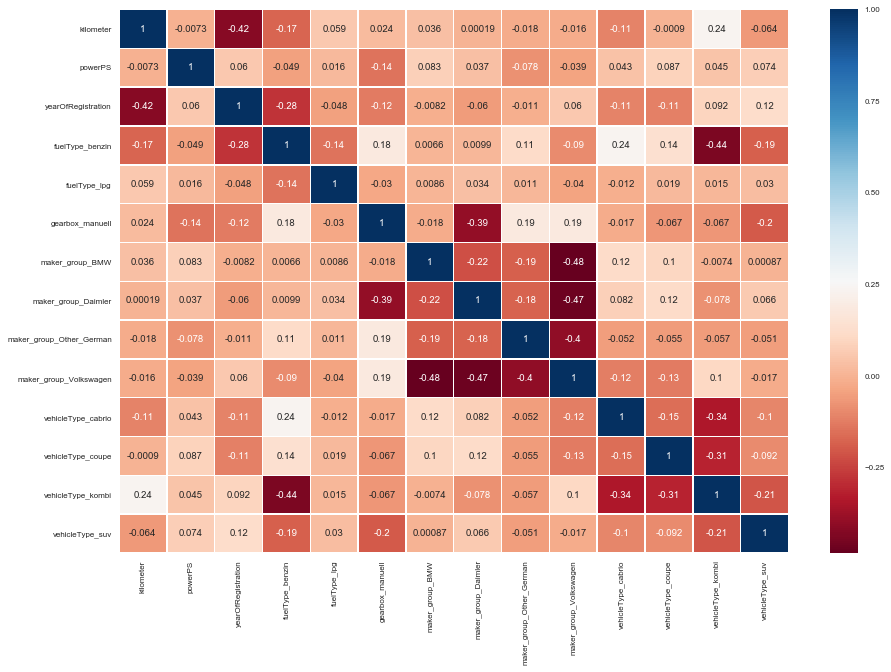

In [125]:
sns.set(font_scale=0.8)
plt.figure(figsize=(15,10))
sns.heatmap(X_all.corr(), annot=True, cmap='RdBu', linewidths=.5)
#pylab.savefig('correlations', dpi = 80, figsize = (20,6))
plt.show()

In [95]:
""" Drop 'vehicleType_kleinwagen', 'gearbox_automatik', 'fuelType_diesel'

"""

X_all.drop(['vehicleType_kleinwagen', 'gearbox_automatik', 'fuelType_diesel'], axis=1, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [96]:
X_all_pickle = open('X_all.pkl', 'wb')
pickle.dump(X_all, X_all_pickle)
X_all_pickle.close()

In [126]:
X_all = pickle.load(open('X_all.pkl', 'rb'))

### PCA -  Method 1: All columns, with all data. 

************Eigenvalues:
 All data:[  2.05223275e+00   1.84404952e+00   1.55537165e+00   1.34313835e+00
   1.26424600e+00   1.14426838e+00   1.05720094e+00   9.53410871e-01
   9.30534376e-01   6.09718747e-01   5.72030952e-01   4.05595645e-01
   2.68201825e-01   7.09708413e-31]


************Cumulative Percentage:
 All data:[  14.66   27.83   38.94   48.53   57.56   65.73   73.28   80.09   86.74
   91.1    95.19   98.09  100.01  100.01]




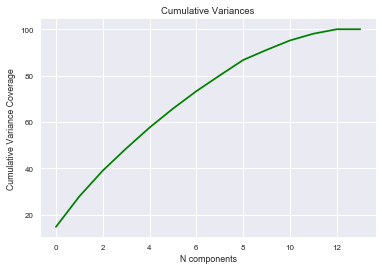

In [127]:
from sklearn.decomposition import PCA

n = len(X_all.columns)
pca_all = PCA(n_components=n)

pca_all.fit(X_all)

# A close representation of eigenvalues:
eigen_all=pca_all.explained_variance_

#The amount of variance that each PC explains
var_all= pca_all.explained_variance_ratio_

# Cumulative Variance explains
var1_all=np.cumsum(np.round(pca_all.explained_variance_ratio_, decimals=4)*100)

print("************Eigenvalues:\n All data:{}\n".format(eigen_all))
print()

print("************Cumulative Percentage:\n All data:{}\n".format(var1_all))
print()

plt.plot(var1_all, color='green', label='all')
plt.title("Cumulative Variances")
plt.xlabel("N components")
plt.ylabel("Cumulative Variance Coverage")
plt.show()


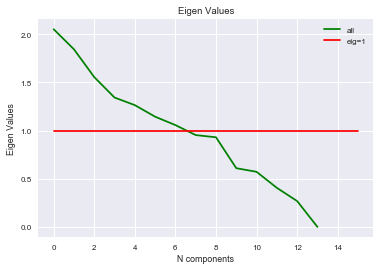

In [188]:
arr = np.array([1]*16) # For creating Kaiser's criterion

plt.plot(eigen_all, color='green', label='all')
plt.plot(arr, color='r', label='eig=1')
plt.legend(loc='upper right')
plt.title("Eigen Values")
plt.xlabel("N components")
plt.ylabel("Eigen Values")
plt.show()

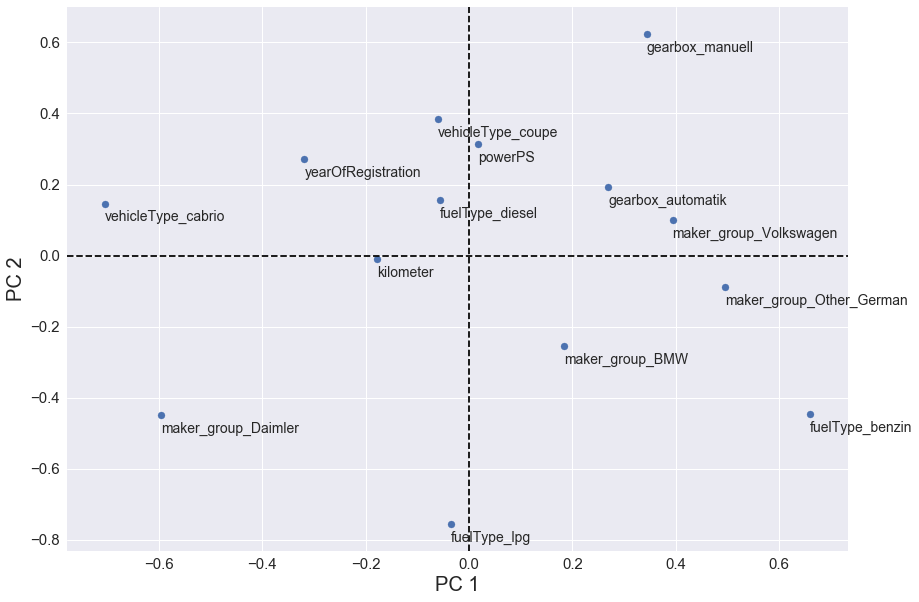

In [138]:
""" Loading:

"""

# Eigen vector:
eig_vector = pca_all.components_

# Create loading:
loadings = eig_vector.T * np.sqrt(pca_all.explained_variance_)
#print(loadings)

# Write loadings out for analysis
loading_df = pd.DataFrame(loadings)
#print(loading_df)

features = ['kilometer', 'powerPS', 'yearOfRegistration', 'fuelType_benzin',
       'fuelType_diesel', 'fuelType_lpg', 'gearbox_automatik',
       'gearbox_manuell', 'maker_group_BMW', 'maker_group_Daimler',
       'maker_group_Other_German', 'maker_group_Volkswagen',
       'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen',
       'vehicleType_kombi', 'vehicleType_suv']

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(loading_df[0], loading_df[1])

#ax.set_title('Loading Plots', fontsize=20)

ax.set_xlabel('PC 1', fontsize=20)
ax.set_ylabel('PC 2', fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')

for i, f in zip(range(14), features):
    ax.annotate(f, (loading_df[0].iloc[i],loading_df[1].iloc[i]-0.05), size = 14)

plt.show()

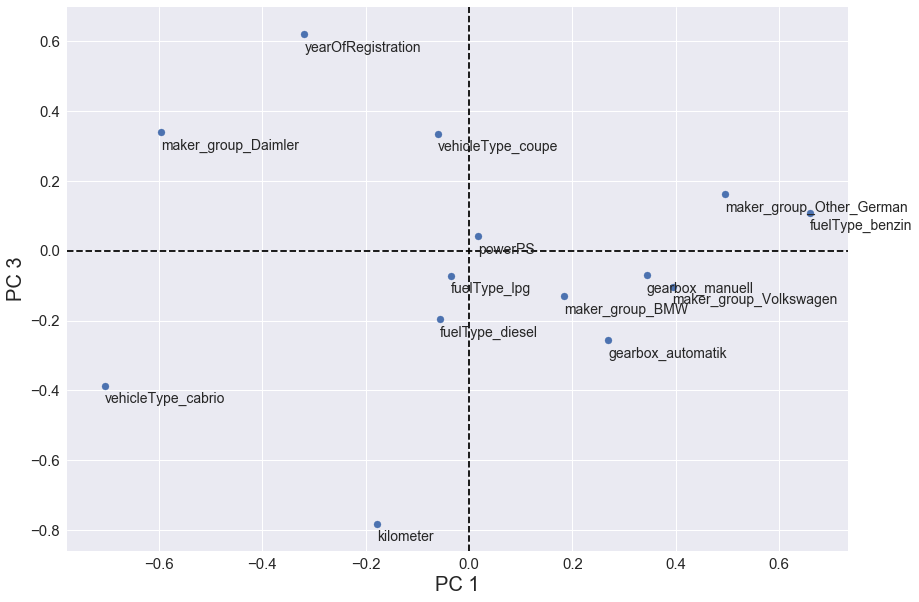

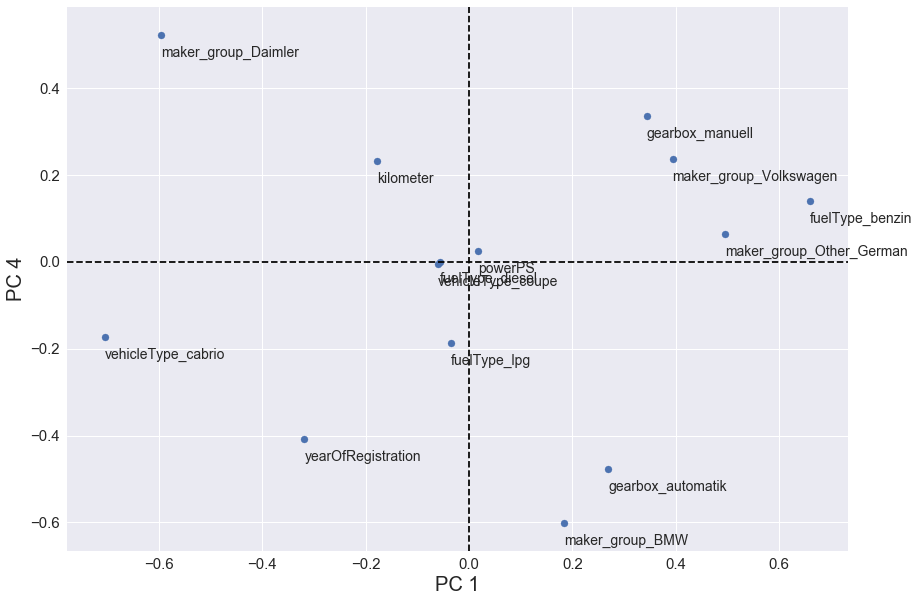

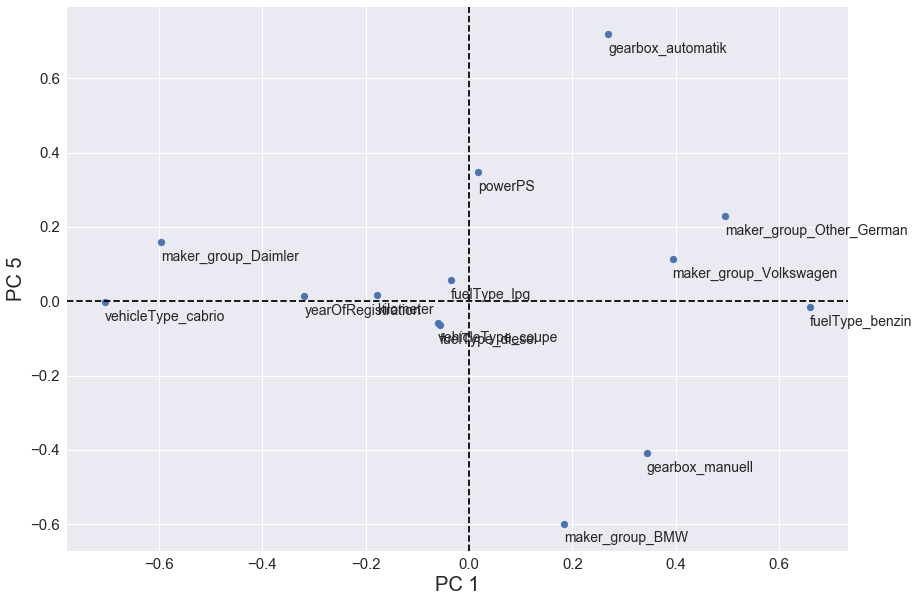

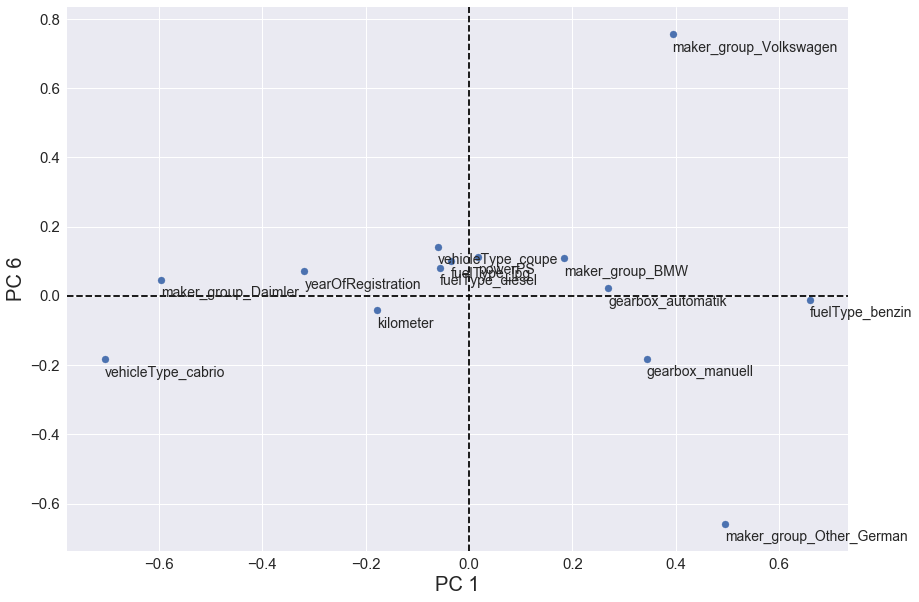

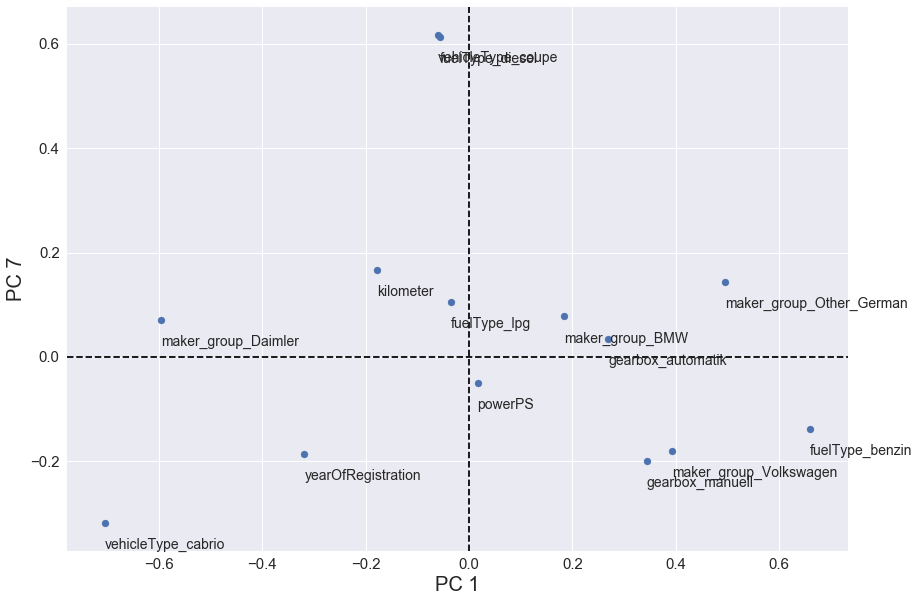

In [139]:
# Eigen vector:
eig_vector = pca_all.components_

# Create loading:
loadings = eig_vector.T * np.sqrt(pca_all.explained_variance_)
#print(loadings)

# Write loadings out for analysis
loading_df = pd.DataFrame(loadings)
#print(loading_df)

for i in range(2,7):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(loading_df[0], loading_df[i])

    #ax.set_title('Loading Plots', fontsize=20)

    ax.set_xlabel('PC 1', fontsize=20)
    ax.set_ylabel('PC {}'.format(i+1), fontsize=20)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.axvline(0, color='k', linestyle='--')
    ax.axhline(0, color='k', linestyle='--')

    for j, f in zip(range(14), features):
        ax.annotate(f, (loading_df[0].iloc[j],loading_df[i].iloc[j]-0.05), size=14)

    plt.show()

In [195]:
print(X_all_7)

[[-0.48015435 -0.16993297  0.75046833 ...,  0.55856996  2.49146075
  -0.34254067]
 [-0.09332664 -1.53340381 -0.04041358 ...,  0.03377674  0.12100365
   0.34380156]
 [-1.10784086 -0.62771319  1.27934984 ...,  0.0454312   0.27191737
   0.17023996]
 ..., 
 [-0.87201713  0.43266035 -1.61014518 ...,  1.31587039 -0.23818247
  -0.1643362 ]
 [ 2.51984027  1.35145517  0.06943055 ..., -0.70651393 -2.34581318
  -0.20362739]
 [-2.07228311 -0.58055808 -0.76319709 ...,  0.09920973 -0.18333547
  -0.0468815 ]]


### Linear

In [62]:
# With standardized price:

from sklearn.decomposition import PCA

pca_7 = PCA(n_components=7)

X_all_7 = pca_7.fit_transform(X_all)

proportions = [0.5, 0.4, 0.3]

for p in proportions:
    proportion = p*100
    print("**********TEST_SIZE: {}% of the whole data*************".format(proportion))
    
    X_train, X_test, y_train, y_test = train_test_split(X_all_7, y, test_size=p, random_state=0)
    
    # Initiate:
    regr = linear_model.LinearRegression()


    # Fit data:
    regr.fit(X_train, y_train) 

    # Predict based on the X_test:
    #print(knn.predict(X_test))
    y_pred = regr.predict(X_test)
    
    score = regr.score(X_test, y_test)
    print("Accuracy for this model: {}".format(np.round(score,4)))
    
    rmse = metrics.mean_squared_error(y_test, y_pred)      
    print("RMSE - {}".format(rmse))
    r2 = metrics.r2_score(y_test, y_pred)
    print("R2 - {}".format(r2))
    print()

    

**********TEST_SIZE: 50.0% of the whole data*************
Accuracy for this model: 0.3982
RMSE - 0.6044233867051853
R2 - 0.39822469917245806

**********TEST_SIZE: 40.0% of the whole data*************
Accuracy for this model: 0.4004
RMSE - 0.6092841060462679
R2 - 0.40043666019225566

**********TEST_SIZE: 30.0% of the whole data*************
Accuracy for this model: 0.4097
RMSE - 0.5917276130981771
R2 - 0.40968376307001



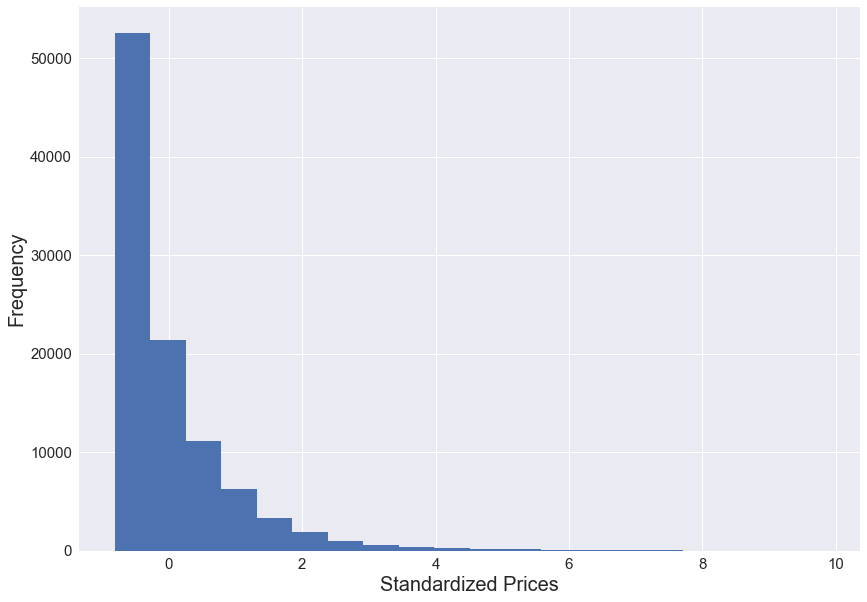

In [163]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(1, 1, 1)

ax.hist(y, bins=20)

#ax.set_title('Loading Plots', fontsize=20)

ax.set_xlabel('Standardized Prices', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.show()

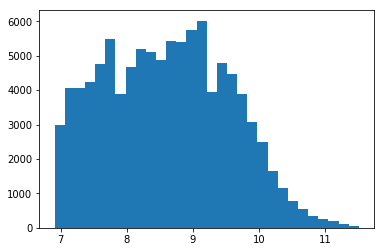

In [58]:
# Logged normal price: Cannot use standardized prices since it has negative values.

# convert y into original integers. 
int_y = y*stds['price']+means['price']
int_y = [int(i) for i in int_y]

logged_y = np.log(int_y)
#print(len(logged_y))
logged_y.tolist()
plt.hist(logged_y, bins=30)
plt.show()

In [59]:
# standardize data:

logged_mean = np.mean(logged_y)
logged_std = np.std(logged_y)
logged_y_stand = (logged_y - logged_mean)/logged_std


In [61]:
proportions = [0.5, 0.4, 0.3]

for p in proportions:
    proportion = p*100
    print("**********TEST_SIZE: {}% of the whole data*************".format(proportion))
    
    X_train, X_test, y_train, y_test = train_test_split(X_all_7, logged_y_stand, test_size=p, random_state=0)
    
    # Initiate:
    regr = linear_model.LinearRegression()


    # Fit data:
    regr.fit(X_train, y_train) 

    # Predict based on the X_test:
    #print(knn.predict(X_test))
    y_pred = regr.predict(X_test)
    
    score = regr.score(X_test, y_test)
    print("Accuracy for this model: {}".format(np.round(score,4)))
    
    rmse = metrics.mean_squared_error(y_test, y_pred)      
    print("RMSE - {}".format(rmse))
    r2 = metrics.r2_score(y_test, y_pred)
    print("R2 - {}".format(r2))
    print()

**********TEST_SIZE: 50.0% of the whole data*************
Accuracy for this model: 0.5243
RMSE - 0.4751561629695468
R2 - 0.5242853763416859

**********TEST_SIZE: 40.0% of the whole data*************
Accuracy for this model: 0.5283
RMSE - 0.47183945514501113
R2 - 0.5283098991242134

**********TEST_SIZE: 30.0% of the whole data*************
Accuracy for this model: 0.5299
RMSE - 0.46964713584235884
R2 - 0.5299123121021807



# Try to use multinomial classification

### Create classes with prices. 

In [67]:
# Inspect prices:
# convert y into original integers. 
int_y = y*stds['price']+means['price']
int_y = [int(i) for i in int_y]

df_y = pd.DataFrame(int_y)

df_y.describe()

,0
count,99651.000000
mean,8539.529157
std,9301.448844
min,1000.000000
25%,2500.000000
50%,5500.000000
75%,11110.000000
max,99999.000000


In [74]:
# use 5000 as step lengths:
org = min(int_y)

new_y = []

for j in int_y:
    for i in range(20):
        low = org+i*5000
        high = org+(i+1)*5000
        if j < high and j>= low:
            new_y.append(i)


In [77]:
pca_7 = PCA(n_components=7)

X_all_7 = pca_7.fit_transform(X_all)

proportions = [0.5, 0.4, 0.3]

for p in proportions:
    proportion = p*100
    print("**********TEST_SIZE: {}% of the whole data*************".format(proportion))
    
    X_train, X_test, y_train, y_test = train_test_split(X_all_7, new_y, test_size=p, random_state=0)
    
    # Initiate:
    NB_all = GaussianNB()
    NB_all.fit(X_train, y_train)
    
    y_pred = NB_all.predict(X_test)
    
    score = NB_all.score(X_test, y_test)
    print("Accuracy: {}".format(np.round(score,4)))

**********TEST_SIZE: 50.0% of the whole data*************
Accuracy: 0.569
**********TEST_SIZE: 40.0% of the whole data*************
Accuracy: 0.5655
**********TEST_SIZE: 30.0% of the whole data*************
Accuracy: 0.5652


In [79]:
# Cross-validation and Classification_report for 30%:
NB = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X_all_7, new_y, test_size=0.3, random_state=0)

NB.fit(X_train, y_train)

scores = cross_val_score(NB, X_all_7, new_y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()

# Print the metrics report.
# Need to use training and testing sets:
y_pred = NB.predict(X_test)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(y_test, y_pred)))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(y_test, y_pred)))

10 fold scores are
[ 0.56386605  0.56243105  0.56204233  0.56355975  0.56526538  0.56628199
  0.56509084  0.5625502   0.56752686  0.55835677]

Average Accuracy = 0.5637

Classification report for classifier 
             precision    recall  f1-score   support

          0       0.68      0.94      0.79     16006
          1       0.27      0.20      0.23      6412
          2       0.26      0.10      0.14      3365
          3       0.18      0.09      0.12      1757
          4       0.12      0.13      0.12       981
          5       0.09      0.01      0.01       499
          6       0.00      0.00      0.00       267
          7       0.00      0.00      0.00       190
          8       0.00      0.00      0.00       121
          9       0.00      0.00      0.00        78
         10       0.00      0.00      0.00        52
         11       0.00      0.00      0.00        56
         12       0.00      0.00      0.00        29
         13       0.00      0.00      0.00       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Heavily biased. Adjust y again.

In [84]:
c = Counter(new_y)
print(c)

Counter({0: 53349, 1: 21373, 2: 11159, 3: 5883, 4: 3235, 5: 1790, 6: 937, 7: 586, 8: 382, 9: 241, 10: 168, 11: 147, 13: 105, 12: 102, 14: 59, 15: 40, 16: 31, 17: 26, 19: 21, 18: 17})


In [85]:
# Combine all classes after '4':

classes = list(range(4,20))

adjusted_y = []
for c in new_y:
    if c in classes:
        adjusted_y.append(4)
    else:
        adjusted_y.append(c)
        
new_c = Counter(adjusted_y)
print(new_c)

Counter({0: 53349, 1: 21373, 2: 11159, 4: 7887, 3: 5883})


In [86]:
# Gaussian with adjusted_y:

# Cross-validation and Classification_report for 30%:
NB = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X_all_7, adjusted_y, test_size=0.3, random_state=0)

NB.fit(X_train, y_train)

scores = cross_val_score(NB, X_all_7, adjusted_y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()

# Print the metrics report.
# Need to use training and testing sets:
y_pred = NB.predict(X_test)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(y_test, y_pred)))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(y_test, y_pred)))

10 fold scores are
[ 0.58462928  0.57881007  0.58222133  0.58153537  0.58314099  0.58193678
  0.58595083  0.58269771  0.58500602  0.57849829]

Average Accuracy = 0.5824

Classification report for classifier 
             precision    recall  f1-score   support

          0       0.68      0.94      0.79     16006
          1       0.27      0.18      0.22      6412
          2       0.28      0.03      0.05      3365
          3       0.00      0.00      0.00      1757
          4       0.37      0.53      0.44      2356

avg / total       0.49      0.58      0.51     29896


Contingency Table for classifier 
[[14988   607    13     0   398]
 [ 4643  1154    47     0   568]
 [ 1563  1089    94     0   619]
 [  463   669    73     0   552]
 [  281   715   107     0  1253]]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Still biased with class 3:

- Down sampling.

In [88]:
X_all.head()

,kilometer,powerPS,yearOfRegistration,fuelType_benzin,fuelType_lpg,gearbox_manuell,maker_group_BMW,maker_group_Daimler,maker_group_Other_German,maker_group_Volkswagen,vehicleType_cabrio,vehicleType_coupe,vehicleType_kombi,vehicleType_suv
0,0.048289,0.248077,1.108138,-1.243670,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,2.674074,-0.833233,-0.246472
1,0.665058,-0.334117,-0.531104,0.804064,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,-0.833233,-0.246472
2,-0.815188,-0.364492,0.616365,-1.243670,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,-0.833233,-0.246472
3,0.665058,-0.005051,0.124593,-1.243670,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,1.200133,-0.246472
4,-0.568480,0.096200,0.780290,0.804064,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,2.674074,-0.833233,-0.246472


In [97]:
df_all = X_all.copy()

In [98]:
df_all['class'] =  adjusted_y

In [100]:
print(df_all.shape)
df_all.head()

(99651, 15)


,kilometer,powerPS,yearOfRegistration,fuelType_benzin,fuelType_lpg,gearbox_manuell,maker_group_BMW,maker_group_Daimler,maker_group_Other_German,maker_group_Volkswagen,vehicleType_cabrio,vehicleType_coupe,vehicleType_kombi,vehicleType_suv,class
0,0.048289,0.248077,1.108138,-1.243670,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,2.674074,-0.833233,-0.246472,3
1,0.665058,-0.334117,-0.531104,0.804064,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,-0.833233,-0.246472,0
2,-0.815188,-0.364492,0.616365,-1.243670,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,-0.833233,-0.246472,0
3,0.665058,-0.005051,0.124593,-1.243670,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,-0.373957,1.200133,-0.246472,0
4,-0.568480,0.096200,0.780290,0.804064,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.40992,2.674074,-0.833233,-0.246472,1


In [103]:
# Unbiased classes:

from sklearn.utils import shuffle

n = 5883

class_0 = (df_all[df_all['class']==0]).sample(n=n, random_state=20)
class_1 = (df_all[df_all['class']==1]).sample(n=n, random_state=20)
class_2 = (df_all[df_all['class']==2]).sample(n=n, random_state=20)
class_3 = (df_all[df_all['class']==3])
class_4 = (df_all[df_all['class']==4]).sample(n=n, random_state=20)

sample = pd.concat([class_0, class_1, class_2, class_3, class_4], axis=0)
print(sample.shape)
np.random.seed(0)
sample = shuffle(sample)
print(sample.shape)
sample = sample.reset_index(drop=True)
sample.head(8)

(29415, 15)
(29415, 15)


,kilometer,powerPS,yearOfRegistration,fuelType_benzin,fuelType_lpg,gearbox_manuell,maker_group_BMW,maker_group_Daimler,maker_group_Other_German,maker_group_Volkswagen,vehicleType_cabrio,vehicleType_coupe,vehicleType_kombi,vehicleType_suv,class
0,-0.568480,0.146826,0.780290,0.804064,-0.115014,0.676292,2.100813,-0.460309,-0.391467,-1.015213,2.439476,-0.373957,-0.833233,-0.246472,3
1,0.665058,0.592331,0.288517,0.804064,-0.115014,-1.478635,2.100813,-0.460309,-0.391467,-1.015213,2.439476,-0.373957,-0.833233,-0.246472,4
2,-1.308604,0.197451,1.108138,0.804064,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.409920,-0.373957,1.200133,-0.246472,3
3,-1.308604,-0.106302,0.616365,0.804064,-0.115014,0.676292,2.100813,-0.460309,-0.391467,-1.015213,-0.409920,-0.373957,-0.833233,-0.246472,2
4,0.665058,-0.005051,0.616365,-1.243670,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,-0.409920,-0.373957,1.200133,-0.246472,2
5,0.665058,1.083399,0.288517,0.804064,-0.115014,0.676292,-0.476001,-0.460309,-0.391467,0.985005,2.439476,-0.373957,-0.833233,-0.246472,4
6,0.665058,-0.005051,-0.695029,-1.243670,-0.115014,-1.478635,-0.476001,2.172432,-0.391467,-1.015213,-0.409920,-0.373957,1.200133,-0.246472,0
7,0.665058,0.111388,-0.367180,0.804064,-0.115014,0.676292,-0.476001,2.172432,-0.391467,-1.015213,-0.409920,-0.373957,1.200133,-0.246472,0


In [ ]:
# Need to use unbiased data to train, but use the 'real' data to test:

col_X_all = ['kilometer',
 'powerPS',
 'yearOfRegistration',
 'fuelType_benzin',
 'fuelType_lpg',
 'gearbox_manuell',
 'maker_group_BMW',
 'maker_group_Daimler',
 'maker_group_Other_German',
 'maker_group_Volkswagen',
 'vehicleType_cabrio',
 'vehicleType_coupe',
 'vehicleType_kombi',
 'vehicleType_suv']

X_sampled = sample[col_X_all]
y_sampled = sample['class']

In [110]:
pca_7 = PCA(n_components=7)

X_sampled_7 = pca_7.fit_transform(X_sampled)

# Cross-validation and Classification_report:
NB = GaussianNB()

NB.fit(X_sampled_7, y_sampled)

scores = cross_val_score(NB, X_sampled_7, y_sampled, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()


# Need to use training and testing sets, which is the same test set as the previous model 
# which is also the real test set with biased classes. 

X_train, X_test, y_train, y_test = train_test_split(X_all_7, adjusted_y, test_size=0.3, random_state=0)

y_pred = NB.predict(X_test)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(y_test, y_pred)))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(y_test, y_pred)))

10 fold scores are
[ 0.41765705  0.43191851  0.39320883  0.42210884  0.4047619   0.41802721
  0.41564626  0.41598639  0.41428571  0.42040816]

Average Accuracy = 0.4154

Classification report for classifier 
             precision    recall  f1-score   support

          0       0.46      0.19      0.27     16006
          1       0.12      0.14      0.13      6412
          2       0.11      0.04      0.06      3365
          3       0.05      0.27      0.08      1757
          4       0.11      0.23      0.15      2356

avg / total       0.30      0.17      0.20     29896


Contingency Table for classifier 
[[3055 5099  573 5374 1905]
 [1792  906  216 2298 1200]
 [ 931  479  145 1100  710]
 [ 453  279  133  469  423]
 [ 412  592  255  562  535]]



### From this result, I decided to accept the fact that the GaussianNB with biased data can only work for certain classes, since this classifier has worse accuracy scores. 

# Write to pkl for Further Use
- X_sampled
- X_sampled_7
- y_sampled
- X_all_7
- adjusted_y

In [118]:
X_sampled_pickle = open('X_sampled.pkl', 'wb')
pickle.dump(X_sampled, X_sampled_pickle)
X_sampled_pickle.close()

In [119]:
X_sampled_7_pickle = open('X_sampled_7.pkl', 'wb')
pickle.dump(X_sampled_7, X_sampled_7_pickle)
X_sampled_7_pickle.close()

In [120]:
y_sampled_pickle = open('y_sampled.pkl', 'wb')
pickle.dump(y_sampled, y_sampled_pickle)
y_sampled_pickle.close()

In [121]:
X_all_7_pickle = open('X_all_7.pkl', 'wb')
pickle.dump(X_all_7, X_all_7_pickle)
X_all_7_pickle.close()

In [124]:
adjusted_y_pickle = open('adjusted_y.pkl', 'wb')
pickle.dump(adjusted_y, adjusted_y_pickle)
adjusted_y_pickle.close()

# MaxEnt

### Biased classes:

In [111]:
# Multinomial Logistic:
classifier = linear_model.LogisticRegression(multi_class = "multinomial", 
                                            solver = 'lbfgs')
# Gridsearch parameters:
parameters = {'C':[0.1, 1, 10]}

clf = GridSearchCV(classifier, parameters)
clf.fit(X_all_7, adjusted_y)
print(clf.best_score_)
print(clf.best_estimator_)
print()

0.638307693852
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)



In [113]:
# Multinomial Logistic:
classifier = linear_model.LogisticRegression(C=10, multi_class = "multinomial", 
                                            solver = 'lbfgs')
X_train, X_test, y_train, y_test = train_test_split(X_all_7, adjusted_y, test_size=0.3, random_state=0)

classifier.fit(X_train, y_train)

scores = cross_val_score(classifier, X_all_7, adjusted_y, cv=10)
print("10 fold scores are")
print(scores)
print("Average Accuracy = %.4f" % np.mean(scores))

y_pred = classifier.predict(X_test)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(y_test, y_pred)))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(y_test, y_pred)))

10 fold scores are
[ 0.63810575  0.63499549  0.63700211  0.63542398  0.63973909  0.6446563
  0.63913698  0.63950221  0.64110799  0.63681992]

Average Accuracy = 0.6386

Classification report for classifier 
             precision    recall  f1-score   support

          0       0.75      0.93      0.83     16006
          1       0.40      0.37      0.39      6412
          2       0.32      0.09      0.14      3365
          3       0.46      0.00      0.01      1757
          4       0.51      0.67      0.58      2356

avg / total       0.59      0.64      0.59     29896


Contingency Table for classifier 
[[14908   936    28     1   133]
 [ 3535  2388   191     0   298]
 [  916  1623   300     1   525]
 [  268   688   209     6   586]
 [  231   321   218     5  1581]]



## Unbiased:

In [114]:
# Multinomial Logistic:
classifier = linear_model.LogisticRegression(multi_class = "multinomial", 
                                            solver = 'lbfgs')
# Gridsearch parameters:
parameters = {'C':[0.1, 1, 10]}

clf = GridSearchCV(classifier, parameters)
clf.fit(X_sampled_7, y_sampled)
print(clf.best_score_)
print(clf.best_estimator_)
print()

0.527112017678
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)



In [116]:
# Multinomial Logistic:
classifier = linear_model.LogisticRegression(C=1, multi_class = "multinomial", 
                                            solver = 'lbfgs')

X_train, X_test, y_train, y_test = train_test_split(X_all_7, adjusted_y, test_size=0.3, random_state=0)

classifier.fit(X_sampled_7, y_sampled)

scores = cross_val_score(classifier, X_sampled_7, y_sampled, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))

y_pred = classifier.predict(X_test)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(y_test, y_pred)))
# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(y_test, y_pred)))

10 fold scores are
[ 0.52020374  0.5344652   0.5286927   0.52176871  0.52176871  0.53367347
  0.52380952  0.53809524  0.52891156  0.53367347]

Average Accuracy = 0.5285

Classification report for classifier 
             precision    recall  f1-score   support

          0       0.50      0.23      0.31     16006
          1       0.21      0.31      0.25      6412
          2       0.07      0.07      0.07      3365
          3       0.12      0.07      0.09      1757
          4       0.12      0.44      0.19      2356

avg / total       0.34      0.24      0.25     29896


Contingency Table for classifier 
[[3678 6386 2342  346 3254]
 [1704 2019  417  208 2064]
 [ 892  726  248  203 1296]
 [ 506  260  152  125  714]
 [ 568  243  334  165 1046]]



## SVM

- Biased classes

In [142]:
# SVM
svr = svm.SVC()

X_train, X_test, y_train, y_test = train_test_split(X_all_7, adjusted_y, test_size=0.3, random_state=0)

svr.fit(X_train, y_train)

scores = cross_val_score(svr, X_all_7, adjusted_y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()

# Print the metrics report.
# Need to use training and testing sets:
y_pred = svr.predict(X_test)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(y_test, y_pred)))

contingency = metrics.confusion_matrix(y_test, y_pred)
# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(y_test, y_pred)))


10 fold scores are
[ 0.7596067   0.76301796  0.76452293  0.75694932  0.7549423   0.76467637
  0.76226794  0.7668607   0.76053794  0.75687613]

Average Accuracy = 0.7610

Classification report for classifier 
             precision    recall  f1-score   support

          0       0.90      0.92      0.91     16006
          1       0.61      0.67      0.64      6412
          2       0.46      0.47      0.47      3365
          3       0.42      0.16      0.24      1757
          4       0.72      0.74      0.73      2356

avg / total       0.75      0.76      0.75     29896


Contingency Table for classifier 
[[14697  1194    82     6    27]
 [ 1377  4312   615    13    95]
 [  134  1289  1587   164   191]
 [   49   189   866   286   367]
 [   72    54   290   208  1732]]



In [123]:
svr = svm.SVC()

X_train, X_test, y_train, y_test = train_test_split(X_all_7, adjusted_y, test_size=0.3, random_state=0)

svr.fit(X_sampled_7, y_sampled)

scores = cross_val_score(svr, X_sampled_7, y_sampled, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()

y_pred = svr.predict(X_test)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(y_test, y_pred)))

print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(y_test, y_pred)))


10 fold scores are
[ 0.66417657  0.66893039  0.66519525  0.65986395  0.6585034   0.66258503
  0.68333333  0.6755102   0.67789116  0.66870748]

Average Accuracy = 0.6685

Classification report for classifier 
             precision    recall  f1-score   support

          0       0.54      0.22      0.32     16006
          1       0.29      0.32      0.31      6412
          2       0.08      0.07      0.07      3365
          3       0.03      0.09      0.05      1757
          4       0.14      0.50      0.22      2356

avg / total       0.37      0.24      0.26     29896


Contingency Table for classifier 
[[3593 3212 2104 3502 3595]
 [1481 2065  433  839 1594]
 [ 699  975  227  336 1128]
 [ 409  384   91  159  714]
 [ 514  368  121  171 1182]]



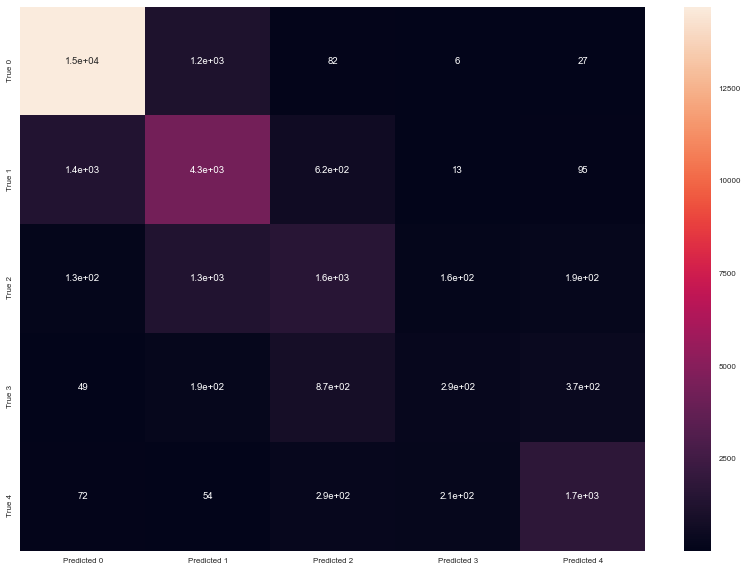

In [152]:
df_cm = pd.DataFrame(contingency, index = ["True 0", "True 1",
                                           "True 2", "True 3",
                                           "True 4"],
                  columns = ["Predicted 0", "Predicted 1",
                             "Predicted 2", "Predicted 3",
                             "Predicted 4"])
plt.figure(figsize = (14,10))
sns.heatmap(df_cm, annot=True)
plt.show()

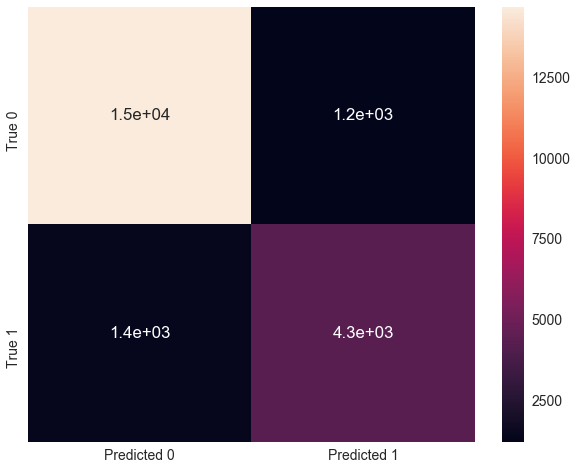

In [157]:
sns.set(font_scale=1.4)
df_cm = pd.DataFrame(contingency[:2,:2], 
                     index = ["True 0", "True 1"],
                  columns = ["Predicted 0", "Predicted 1"])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)
plt.show()

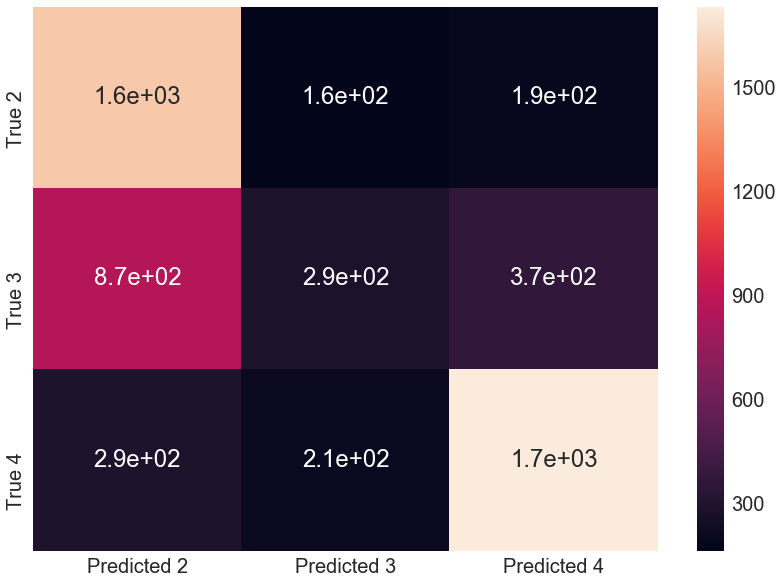

In [160]:
sns.set(font_scale=2)
df_cm = pd.DataFrame(contingency[2:, 2:], index = ["True 2", "True 3",
                                           "True 4"],
                  columns = ["Predicted 2", "Predicted 3",
                             "Predicted 4"])
plt.figure(figsize = (14,10))
sns.heatmap(df_cm, annot=True)
plt.show()